In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import warnings
warnings.filterwarnings('ignore')

In [4]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


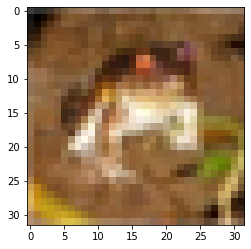

In [6]:
plt.imshow(X_train[0])

In [7]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
classes[y_train[0][0]]

'frog'

In [11]:
X_train.shape

(50000, 32, 32, 3)

In [12]:
X_train, X_test = X_train/255, X_test/255

In [13]:
X_train.max()

1.0

In [37]:
model = Sequential()
#Convolution layers
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D())

model.add(Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D())

model.add(Conv2D(filters=128, kernel_size=(2, 2), strides=(1, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D())

model.add(Flatten())

#hidden layers
model.add(Dense(128, activation='sigmoid',))
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))

#output layer
model.add(Dense(10, activation='softmax'))

In [38]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )

In [40]:
model.fit(X_train, y_train, epochs=100, callbacks=[early_stop], validation_data=(X_test, y_test), batch_size=32, validation_batch_size=32)

Epoch 1/100
1563/1563 [==============================] - 16s 10ms/step - loss: 2.0417 - accuracy: 0.2097 - val_loss: 1.5763 - val_accuracy: 0.4000
Epoch 2/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6071 - accuracy: 0.4017 - val_loss: 1.3919 - val_accuracy: 0.4828
Epoch 3/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4094 - accuracy: 0.4920 - val_loss: 1.1739 - val_accuracy: 0.5773
Epoch 4/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2734 - accuracy: 0.5529 - val_loss: 1.1573 - val_accuracy: 0.5902
Epoch 5/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1772 - accuracy: 0.5950 - val_loss: 1.0439 - val_accuracy: 0.6329
Epoch 6/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0966 - accuracy: 0.6250 - val_loss: 1.0025 - val_accuracy: 0.6464
Epoch 7/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0330 - accuracy: 0.6541 - val_loss: 0.9

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8697 - accuracy: 0.7322


[0.8697269558906555, 0.732200026512146]

In [42]:
loss = pd.DataFrame(model.history.history)

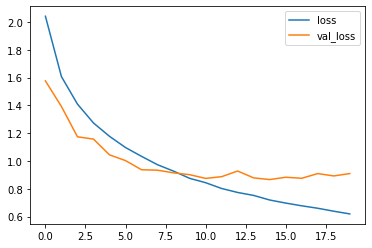

In [43]:
loss[['loss', 'val_loss']].plot()

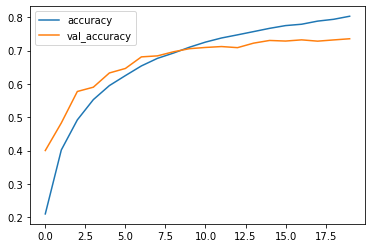

In [44]:
loss[['accuracy', 'val_accuracy']].plot()

In [45]:
pred = model.predict(X_test)

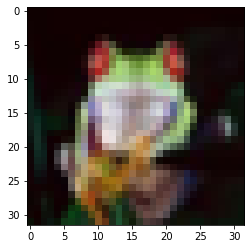

In [47]:
plt.imshow(X_test[102])

In [50]:
classes[np.argmax(pred[102])]

'frog'

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [55]:
vd_preds = np.argmax(pred, axis=1)

In [57]:
print(classification_report(y_test, vd_preds))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1000
           1       0.82      0.88      0.85      1000
           2       0.64      0.66      0.65      1000
           3       0.50      0.57      0.53      1000
           4       0.71      0.66      0.69      1000
           5       0.70      0.59      0.64      1000
           6       0.84      0.79      0.81      1000
           7       0.78      0.78      0.78      1000
           8       0.88      0.82      0.85      1000
           9       0.82      0.81      0.81      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



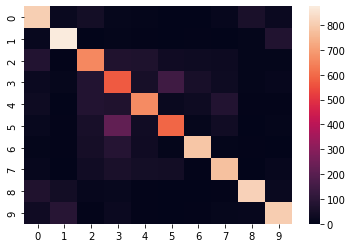

In [58]:
sns.heatmap(confusion_matrix(y_test, vd_preds))

In [59]:
confusion_matrix(y_test, vd_preds)

array([[807,  23,  47,  12,   9,   1,   3,  14,  60,  24],
       [ 18, 875,   0,  10,   4,   0,   4,   3,   8,  78],
       [ 79,   5, 659,  75,  70,  37,  31,  28,   9,   7],
       [ 27,  12,  81, 572,  52, 146,  55,  31,   8,  16],
       [ 33,   3,  82,  73, 664,  21,  33,  82,   5,   4],
       [ 20,   6,  56, 220,  40, 594,  12,  40,   3,   9],
       [  9,   5,  51,  88,  36,   9, 788,   7,   4,   3],
       [ 16,   0,  39,  60,  47,  43,   5, 776,   0,  14],
       [ 73,  42,  14,  18,   4,   1,   3,   6, 816,  23],
       [ 35,  90,   5,  25,   5,   2,   6,  11,  16, 805]])